<a href="https://colab.research.google.com/github/Manu-Anand/tf_certfication/blob/master/stroke_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
#!pip install scikit-plot

In [53]:
#!pip install mlxtend --upgrade --no-deps
import mlxtend                                                          
print(mlxtend.__version__) 

0.17.2


**Install Dependancies below. **
1. pip install -U imbalanced-learn (For SMOTE related libraries)
2. Uses seaborn libraries to plot

In [0]:
#imports required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math 
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as pltp
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

Reads training data from csv file

In [0]:
stroke_data = pd.read_csv('train_2v.csv')

Describes the dataframe. 
1. Rows with null values are seen for 'bmi' and 'smoking_status'
2. Nulls for bmi has been filled with mean of data
3. Nulls/Nans against 'smoking_status' handled by remoning the rows.
4. Class count is displayed in plot 
5. Inference - the data has imbalanced labels - 97% positive classes.

Train columns with null values:
 id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64
Train columns with bmi values:
 id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64
Train n id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0


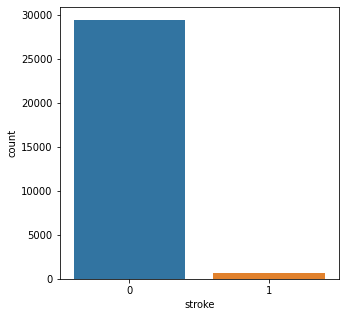

In [56]:
stroke_data.describe(include = 'all')
# The below code shows there are many null values
print('Train columns with null values:\n', stroke_data.isnull().sum())

stroke_data['bmi'].fillna((stroke_data['bmi'].mean()), inplace=True)
print('Train columns with bmi values:\n', stroke_data.isnull().sum())
stroke_data = stroke_data.dropna()
print('Train n', stroke_data.isnull().sum())
class_count = stroke_data.stroke.value_counts()
stroke_data = stroke_data.reset_index()
print(class_count)
# The below code shows that  the data has class imbalance problem
# The data is unbalanced
rcParams['figure.figsize'] = 5, 5
class_count = stroke_data.stroke.value_counts()
print('class count', class_count)
ax = sns.countplot(x="stroke", data=stroke_data)

In [0]:
def label_encoding(data):  
  le = LabelEncoder()
  le.fit(stroke_data[data])
  stroke_data[data] = le.transform(stroke_data[data])
    #labels = datavalue['residual_tumor'] # returns only labels exclusing header

Trainig data is stored in pandas dataframe - 'stroke_data' and uses LabelEncoder to encode categorical variables.

In [58]:
# Smoking status got many Nan Values. So Drops them. Recheck other alternatives
stroke_data = stroke_data[stroke_data['smoking_status'].notna()]
label_encoding("work_type")
label_encoding("Residence_type")
label_encoding("ever_married")
label_encoding("gender")
label_encoding("smoking_status")
label_names = [0, 1]
stroke_data.head(2)

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
1,3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0


1. Split the data as features and Labels (X and y)
2. Normalize the data 

In [59]:
stroke_data_x = stroke_data.drop('stroke', axis=1)
stroke_data_y = stroke_data['stroke']
print(stroke_data_y.value_counts())
#Normalize the data
stroke_data_x = (stroke_data_x - stroke_data_x.min())/(stroke_data_x.max() - stroke_data_x.min())
stroke_data_x.drop(['work_type','Residence_type'], axis=1, inplace=True)
#print(stroke_data_x)
# Remove below line of code if you dont need val dataset
stroke_data_x, x_val, stroke_data_y, y_val = train_test_split(stroke_data_x, stroke_data_y, test_size=0.1, random_state=0, stratify=stroke_data_y)
print(stroke_data_x.shape)

0    29470
1      638
Name: stroke, dtype: int64
(27097, 10)


1. Define a Random Forest classifier in a method

In [0]:
def classify_RandomForestClassifier(estimators, x_train, y_train): 
  rf_classifier = RandomForestClassifier(n_estimators = estimators, random_state = 0)
  rf_classifier.fit(x_train, y_train)
  return rf_classifier

Defines method to display auc curve

In [0]:
def auc_curve(y_test, y_test_pred):
  cnf_matrix_tra = confusion_matrix(y_test, y_test_pred)
  class_names = [0,1]
  plt.figure()
  #plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
  plt.show()
  fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
  roc_auc = auc(fpr,tpr)

  # Plot ROC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([-0.1,1.0])
  plt.ylim([-0.1,1.01])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

1. Displayes correlation amongs features
2. Inference - There is no correlation except for age and ever_married(approx0.4)

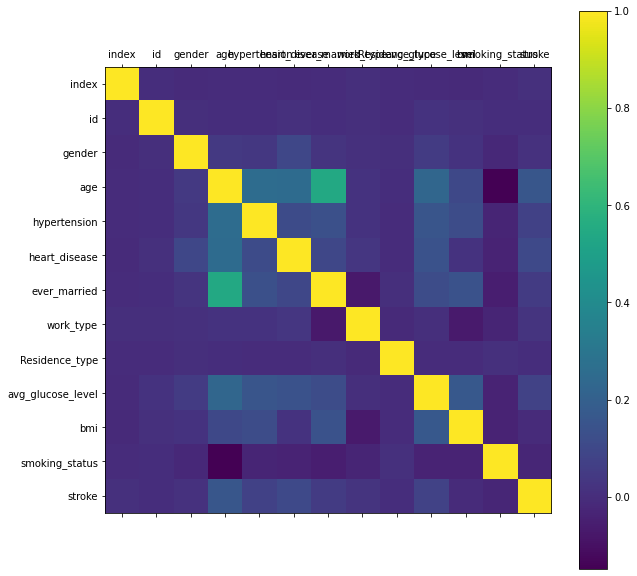

In [62]:
# Displays correlation metrics
# Inference - Age and marriage has some correlation. All other fileds shows very less correlation
rcParams['figure.figsize'] = 10, 10
plt.matshow(stroke_data.corr())
plt.yticks(np.arange(stroke_data.shape[1]), stroke_data.columns)
plt.xticks(np.arange(stroke_data.shape[1]), stroke_data.columns)
plt.colorbar()

1. Displays a count plot of 'bmi' against stoke class

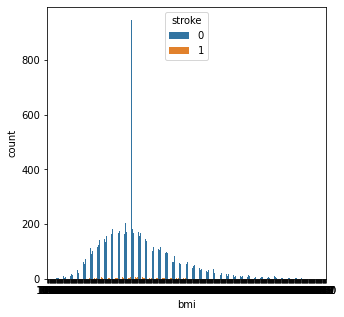

In [63]:

rcParams['figure.figsize'] = 5, 5
ax = sns.countplot(x="bmi", data=stroke_data, hue="stroke")


Below code find out best features

In [0]:
def best_features():
  bestfeatures = SelectKBest(score_func=chi2, k=7)
  fit = bestfeatures.fit(stroke_data_x,stroke_data_y)
  scores = pd.DataFrame(fit.scores_)
  columns = pd.DataFrame(fit.columns)
  #concat two dataframes for better visualization 
  featureScores = pd.concat([columns,scores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  print(featureScores.nlargest(10,'Score'))  #print 10 best features

Below Code splits the data into train and test


In [65]:
# Split the data into predictors and target
#best_features()
x_train, x_test, y_train, y_test = train_test_split(stroke_data_x, stroke_data_y, test_size=0.2, random_state=0, stratify=stroke_data_y)
#x_test_not_used,x_val,y_test_not_used,y_val = train_test_split(x_test, y_test, test_size=0.9, random_state=0, stratify=y_test)
class_count = y_train.value_counts()
print('Class Count : Train Data:   ',class_count)
class_count = y_test.value_counts()
print('Class Count : Test Data:   ',class_count)

Class Count : Train Data:    0    21218
1      459
Name: stroke, dtype: int64
Class Count : Test Data:    0    5305
1     115
Name: stroke, dtype: int64


Calling Random Forest Classifier
1. Inference : Random Forest fails to classify Positive Classes.

Classification Report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5305
           1       0.00      0.00      0.00       115

    accuracy                           0.98      5420
   macro avg       0.49      0.50      0.49      5420
weighted avg       0.96      0.98      0.97      5420



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<Figure size 360x360 with 0 Axes>

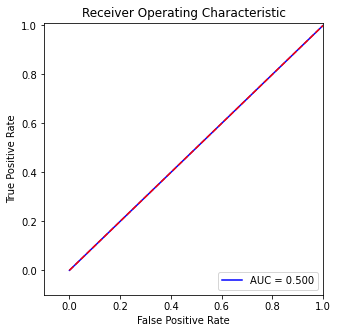

In [66]:
# Invoke RF Classifier
estimators = 100
rf_classifier = classify_RandomForestClassifier(estimators, x_train, y_train)
##print(rf_classifier.score(x_test, y_test))
y_test_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
#print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_test, y_test_pred))
auc_curve(y_test, y_test_pred)

In the below Code, the following applied:
1. SMOTE method is used to oversample minor classe and undersample major class
2. Inference : Precision recall curve and AUC curve shows better

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from skl

0.6809963099630997
Confusion Matrics:  [[3607 1698]
 [  31   84]]
Classification Report               precision    recall  f1-score   support

           0       0.99      0.68      0.81      5305
           1       0.05      0.73      0.09       115

    accuracy                           0.68      5420
   macro avg       0.52      0.71      0.45      5420
weighted avg       0.97      0.68      0.79      5420



<Figure size 360x360 with 0 Axes>

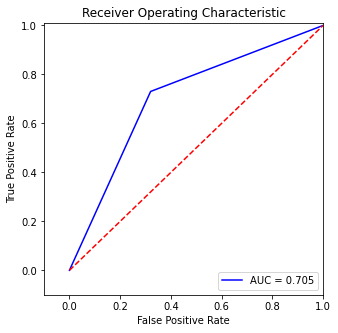

0.6791763533709732
Confusion Matrics For VALIDATION DATA SET:  [[1992  955]
 [  11   53]]
Classification Report - VALIDATION DS               precision    recall  f1-score   support

           0       0.99      0.68      0.80      2947
           1       0.05      0.83      0.10        64

    accuracy                           0.68      3011
   macro avg       0.52      0.75      0.45      3011
weighted avg       0.97      0.68      0.79      3011



<Figure size 360x360 with 0 Axes>

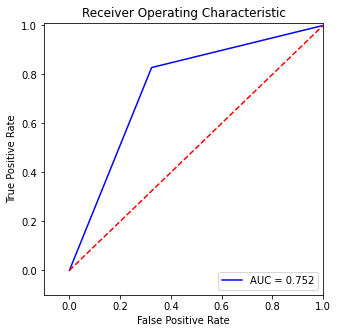

In [67]:

#Oversmaple the minority class 10% of major class
over_sample = SMOTE(sampling_strategy=0.1, random_state=0)
# Undersample the majority class 50% 
under_sample = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
steps = [('o', over_sample), ('u', under_sample)]
# Add this to pipeline
pipeline = Pipeline(steps=steps)
#x_train, y_train = pipeline.fit_resample(x_train, y_train)
estimators = 50
from imblearn.ensemble import EasyEnsembleClassifier
rf_classifier = EasyEnsembleClassifier(n_estimators=10)
rf_classifier.fit(x_train,y_train)
# Evaluate against Test data
print(rf_classifier.score(x_test, y_test))
y_test_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrics: ', cm)
print('Classification Report', classification_report(y_test, y_test_pred))
auc_curve(y_test,y_test_pred)
# Evaluate against Val data
print(rf_classifier.score(x_val, y_val))
y_val_pred = rf_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrics For VALIDATION DATA SET: ', cm)
print('Classification Report - VALIDATION DS', classification_report(y_val, y_val_pred))
auc_curve(y_val,y_val_pred)

Train a Logistic Regression classifier to compare

In [68]:

x_train, x_test, y_train, y_test = train_test_split(stroke_data_x, stroke_data_y, test_size=0.3, random_state=0, stratify=stroke_data_y)
lr1 = LogisticRegression() 
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    4.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [69]:
clf.best_params_
lr1 = LogisticRegression(C=4,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())
y_test_pred = lr1.predict(x_test)
cm = confusion_matrix(y_test, y_test_pred)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


<Figure size 360x360 with 0 Axes>

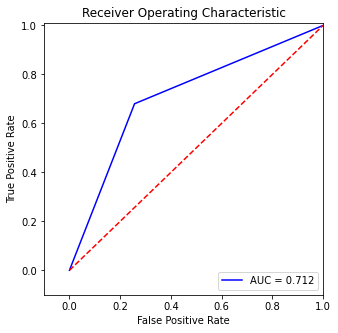

In [70]:
auc_curve(y_test,y_test_pred)